In [1]:
import sys
sys.path.append('../')

import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from sphere.model.implementations.solvers.euler import EulerSolver


solver = EulerSolver(delta_t = 0.1)

num_steps = 100 * int(1/solver.delta_t)

x_t = jnp.ones((3,num_steps))

x_t = x_t.at[:,0].set(jnp.array([500,5,0]))

def SIR_RHS(x_t,t):
    S,I,R = x_t
    N = S + I + R
    dS = -0.3 * S * I/N
    dI = 0.3 * S * I/N - 0.1 * I
    dR = 0.1 * I
    return jnp.array([dS,dI,dR])

for t in range(1,num_steps):
    x_t = x_t.at[:,t].set(solver.solve(SIR_RHS,x_t[:,t-1],t))

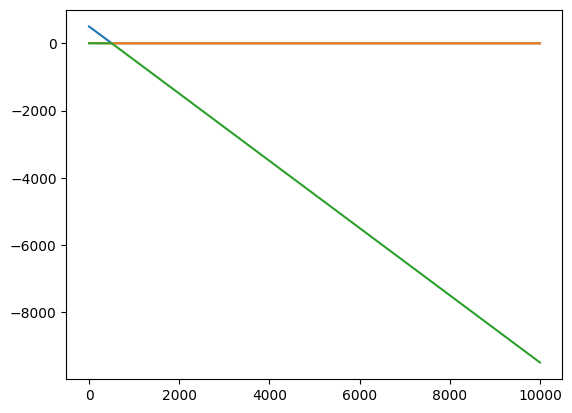

In [5]:
for compartment in range(3):
    plt.plot(x_t[compartment,:])

In [3]:
from sphere.model.implementations.solvers.tau_leap import TauLeapSolver
from jax.random import PRNGKey

key = PRNGKey(1)

solver = TauLeapSolver(tau = 0.01,prng_key = key)

num_steps = 100 * int(1/solver.tau)

x_t = jnp.ones((3,num_steps))

x_t = x_t.at[:,0].set(jnp.array([500,5,0]))

def SIR_RHS(x_t,t):
    S,I,R = x_t
    N = S + I + R
    dS = -0.3 * S * I/N
    dI = 0.3 * S * I/N - 0.1 * I
    dR = 0.1 * I
    return jnp.array([dS,dI,dR])

for t in range(1,num_steps):
    x_t = x_t.at[:,t].set(solver.solve(SIR_RHS,x_t[:,t-1],t))

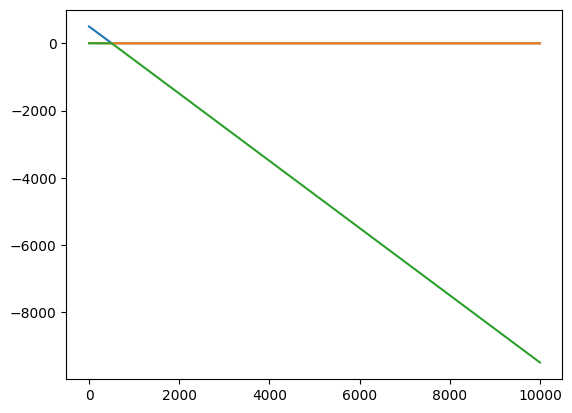

In [4]:
for compartment in range(3):
    plt.plot(x_t[compartment,:])